# Model Explainability

Use SHAP to explain predictions for the best model (XGBoost assumed best based on typical performance).

In [1]:
import sys
import os

# go one level up (from Notebook/ to project root)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import pandas as pd
import shap
from joblib import load
from src.config import PROCESSED_DATA_PATH, MODEL_DIR
from src.utils import log_info

# Load data and model
data = pd.read_csv(PROCESSED_DATA_PATH.replace('.csv', '_engineered.csv'))
X = data.drop('Loan_Status', axis=1)
xgb_model = load(os.path.join(MODEL_DIR, 'xgb_model.sav'))
log_info('Loaded XGBoost model and data')

c:\Users\anxaa\OneDrive\Documents\Github Project\AI-Powered-Loan-Approval-Classifier-main\AI-Powered-Loan-Approval-Classifier-main\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-09-11 02:41:21,026 - INFO - Loaded XGBoost model and data


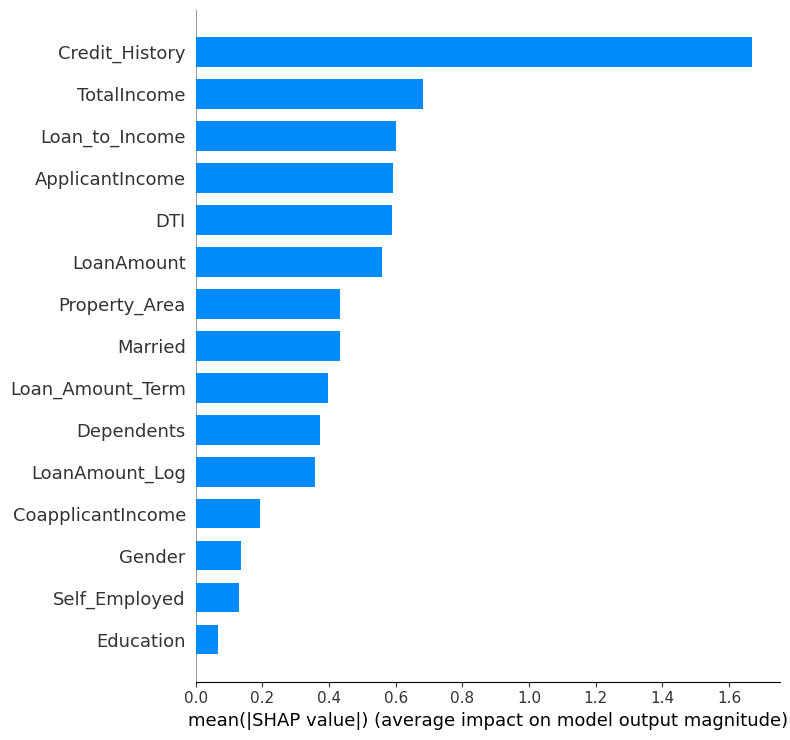

2025-09-11 02:41:42,487 - INFO - SHAP summary plot generated


In [2]:
# SHAP explanation
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type='bar')
log_info('SHAP summary plot generated')